In [23]:
import pandas as pd
pumpkins_df = pd.read_csv("../data/US-pumpkins.csv")
pumpkins_df.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [24]:
pumpkins_df.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [32]:
columns_to_select = ['Package', 'Low Price', 'High Price', 'Date']
pumpkins_df = pumpkins_df.loc[:, columns_to_select]
pumpkins_df = pumpkins_df[pumpkins_df['Package'].str.contains("bushel", case=False)]
pumpkins_df

,Package,Low Price,High Price,Date
70,1 1/9 bushel cartons,15.00,15.0,9/24/16
71,1 1/9 bushel cartons,18.00,18.0,9/24/16
72,1 1/9 bushel cartons,18.00,18.0,10/1/16
73,1 1/9 bushel cartons,17.00,17.0,10/1/16
74,1 1/9 bushel cartons,15.00,15.0,10/8/16
...,...,...,...,...
1738,1/2 bushel cartons,15.00,15.0,9/30/16
1739,1/2 bushel cartons,13.75,15.0,9/30/16
1740,1/2 bushel cartons,10.75,15.0,9/30/16
1741,1/2 bushel cartons,12.00,12.0,9/30/16


In [33]:
pumpkins_df.isnull().sum()
# no null values in these columns

Package       0
Low Price     0
High Price    0
Date          0
dtype: int64

In [34]:
price = (pumpkins_df['Low Price'] + pumpkins_df['High Price']) / 2
month = pd.DatetimeIndex(pumpkins_df['Date']).month

In [35]:
new_pumpkins_df = pd.DataFrame({'Month': month, 'Package': pumpkins_df['Package'], 'Low Price': pumpkins_df['Low Price'], 'High Price': pumpkins_df['High Price'], 'Price': price})
new_pumpkins_df

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.00,15.0,15.000
71,9,1 1/9 bushel cartons,18.00,18.0,18.000
72,10,1 1/9 bushel cartons,18.00,18.0,18.000
73,10,1 1/9 bushel cartons,17.00,17.0,17.000
74,10,1 1/9 bushel cartons,15.00,15.0,15.000
...,...,...,...,...,...
1738,9,1/2 bushel cartons,15.00,15.0,15.000
1739,9,1/2 bushel cartons,13.75,15.0,14.375
1740,9,1/2 bushel cartons,10.75,15.0,12.875
1741,9,1/2 bushel cartons,12.00,12.0,12.000


In [36]:
pumpkins_df = pumpkins_df[pumpkins_df['Package'].str.contains('bushel', case=True, regex=True)]

In [37]:
new_pumpkins_df.loc[new_pumpkins_df['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins_df.loc[new_pumpkins_df['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

In [38]:
new_pumpkins_df

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.00,15.0,13.50
71,9,1 1/9 bushel cartons,18.00,18.0,16.20
72,10,1 1/9 bushel cartons,18.00,18.0,16.20
73,10,1 1/9 bushel cartons,17.00,17.0,15.30
74,10,1 1/9 bushel cartons,15.00,15.0,13.50
...,...,...,...,...,...
1738,9,1/2 bushel cartons,15.00,15.0,30.00
1739,9,1/2 bushel cartons,13.75,15.0,28.75
1740,9,1/2 bushel cartons,10.75,15.0,25.75
1741,9,1/2 bushel cartons,12.00,12.0,24.00


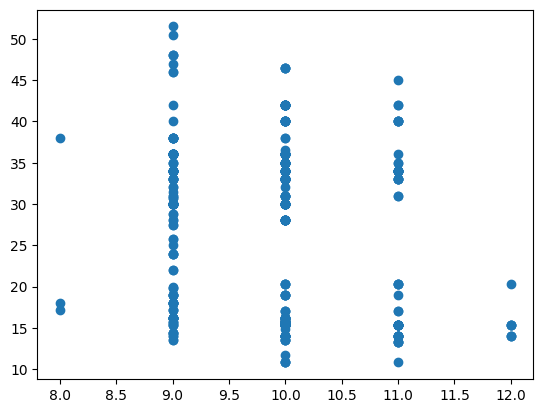

In [41]:
import matplotlib.pyplot as plt

plt.scatter(new_pumpkins_df['Month'], new_pumpkins_df['Price'])

Text(0.5, 1.0, 'Average Price per Month of Pumpkins')

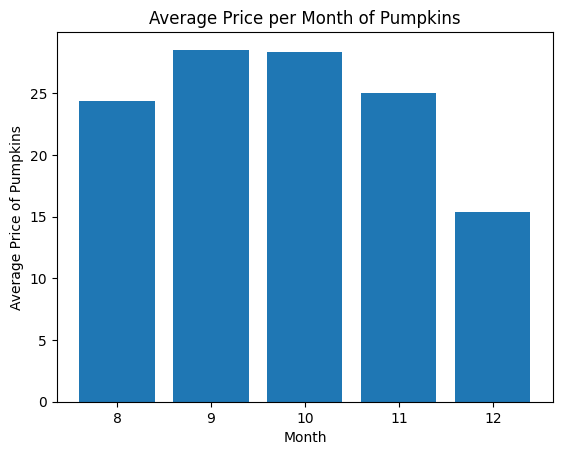

In [46]:
#Change the plot toe average price per month
avg_plot = new_pumpkins_df[["Month", "Price"]].groupby('Month').mean()
plt.bar(avg_plot.index, avg_plot['Price'])
plt.xlabel('Month')
plt.ylabel('Average Price of Pumpkins')
plt.title('Average Price per Month of Pumpkins')